In [1]:
import json
import numpy as np
import cv2
import matplotlib
import pandas as pd
from pandas.io.json import json_normalize

In [2]:
# Get video info
cap = cv2.VideoCapture('video1.mp4')
fps = cap.get(5)
frame_count = cap.get(7)
fps, frame_count

(16.54966554630446, 550.0)

In [3]:
# Select a timeframe
start_time = 3.0
end_time = 10.0
start_frame = start_time * fps
end_frame = end_time * fps
start_frame, end_frame

(49.64899663891338, 165.4966554630446)

In [4]:
# Play timeframe
interval = 25;
cap.set(1, start_frame)

while (cap.isOpened()):
    ret, frame = cap.read()
    if (ret and cap.get(1) <= end_time * fps):
        cv2.imshow('Frame',frame)
        cv2.waitKey(interval)
    else:
        break
        
cv2.destroyAllWindows()

In [5]:
# Import JSON data
with open('SwordObservations1587668690720.json') as f:
    d = json.load(f)
    
df = json_normalize(d['observations']); df

,epochMs,accel.x,accel.y,accel.z,orient.x,orient.y,orient.z,orient.w,rotRate.x,rotRate.y,rotRate.z
0,1587668693033,0.000000,0.000000,0.000000,0.151624,0.287648,0.782490,0.531017,0.000000,0.000000,0.000000
1,1587668693114,-0.021089,0.003437,0.014192,0.149581,0.287631,0.782109,0.532165,0.000000,0.000000,0.000000
2,1587668693170,-0.021089,0.003437,0.014192,0.147413,0.289485,0.783165,0.530208,0.000000,0.000000,0.000000
3,1587668693226,0.000325,-0.006401,0.027803,0.147616,0.290434,0.783565,0.529041,0.000000,0.000000,0.000000
4,1587668693282,0.000325,-0.006401,0.027803,0.145845,0.294016,0.784173,0.526647,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
585,1587668731637,-0.007101,0.005813,-0.010790,0.184961,0.147332,0.218598,0.946730,0.000581,0.002373,-0.011543
586,1587668731704,-0.007101,0.005813,-0.010790,0.183524,0.146891,0.219190,0.946941,0.000581,0.002373,-0.011543
587,1587668731772,0.003603,-0.003610,-0.006981,0.183951,0.148232,0.218794,0.946741,0.000581,0.002373,-0.011543
588,1587668731839,0.003603,-0.003610,-0.006981,0.183712,0.148291,0.218246,0.946905,0.000581,0.002373,-0.011543


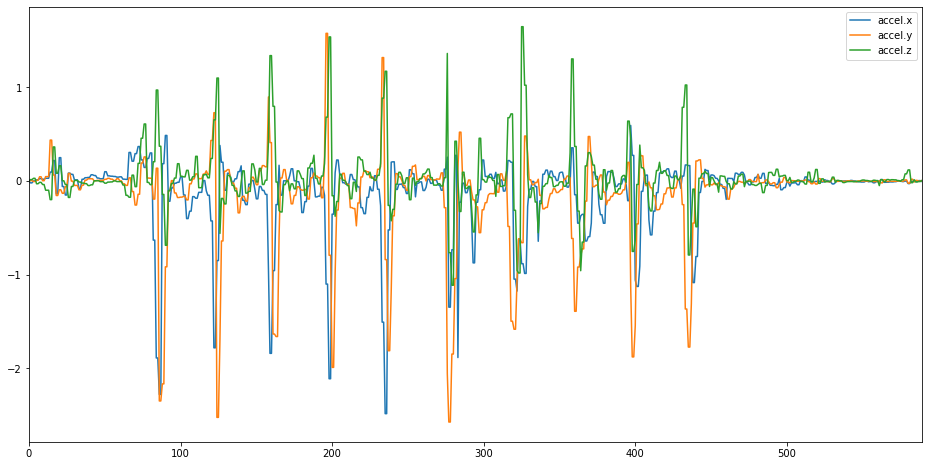

In [25]:
df[['accel.x', 'accel.y', 'accel.z']].plot(figsize=(16,8))